<a href="https://colab.research.google.com/github/cytoscape/cytoscape-automation/blob/master/for-scripters/Python/basic-data-visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Data Visualization
Kozo Nishida and Barry Demchak

2025-01-13

**Cytoscape is an open source software platform for integrating, visualizing, and analyzing measurement data in the context of networks.**

This tutorial presents a scenario of how expression and network data can be combined to tell a biological story and includes these concepts:

*   Visualizing networks using expression data.
*   Filtering networks based on expression data.
*   Assessing expression data in the context of a biological network.

## Installation

First, launch [Cytoscape Desktop](https://cytoscape.org/) and install the [FileTransfer App](http://apps.cytoscape.org/apps/filetransfer).

Then run the following chunk of code below to install the `py4cytoscape` module.


In [24]:
%%capture
!python3 -m pip install python-igraph requests pandas networkx
!python3 -m pip install py4cytoscape
import IPython
import py4cytoscape as p4c

If you are using a remote notebook environment such as Google Colab, please execute the cell below. (If you're running on your local notebook, you don't need to do that.)



In [25]:
#_PY4CYTOSCAPE = 'git+https://github.com/cytoscape/py4cytoscape@1.11.0' # optional
import requests
exec(requests.get("https://raw.githubusercontent.com/cytoscape/jupyter-bridge/master/client/p4c_init.py").text)
IPython.display.Javascript(_PY4CYTOSCAPE_BROWSER_CLIENT_JS) # Start browser client

Skip reloading Javascript client ... b24daafa-1ba6-4336-bc64-02a727c727e4 on https://jupyter-bridge.cytoscape.org


<IPython.core.display.Javascript object>

In [26]:
p4c.cytoscape_version_info()

{'apiVersion': 'v1',
 'cytoscapeVersion': '3.11.0-SNAPSHOT',
 'automationAPIVersion': '1.11.0',
 'py4cytoscapeVersion': '1.11.0',
 'jupyterBridgeVersion': '0.0.2'}

## Loading Network

Let’s open a Cytoscape demo session file:


In [27]:
p4c.open_session()

Opening sampleData/sessions/Yeast Perturbation.cys...


{}

## Visualizing Expression Data on Networks

Probably the most common use of expression data in Cytoscape is to set the **visual properties** of the nodes (color, shape, border) in a network according to expression data. This creates a powerful visualization, portraying functional relation and experimental response at the same time. Here, we will show an example of doing this.

The data used in this example is from yeast, and represents an experiment of perturbations of the genes **Gal1**, **Gal4**, and **Gal80**, which are all yeast transcription factors. For this tutorial, the experimental data was part of the Cytoscape session file you loaded earlier, and is visible in the Node Table:

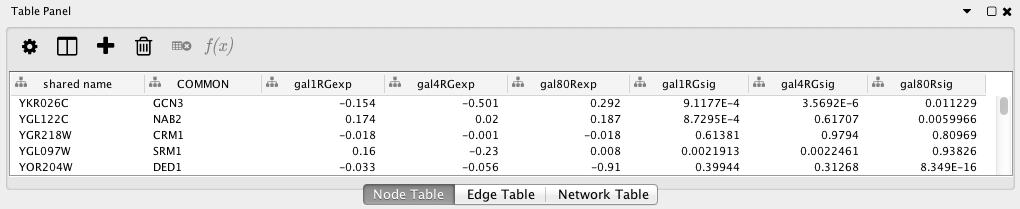

*   You can select nodes in the network by

In [28]:
p4c.select_nodes(['YDL194W', 'YLR345W'], by_col='name')

{'nodes': [169, 155], 'edges': []}

We can now use the data to manipulate the visual properties of the network by mapping specific data columns to visual style properties:

*   The **gal80Rexp** expression values will be mapped to node color; nodes with low expression will be colored blue, nodes with high expression will be colored red.
*   Significance for expression values will be mapped to Node Border Width, so nodes with significant changes will appear with a thicker border.

## Set Node Fill Color

*   Click on the **Style** tab in the Control Panel. And you can set node fill color by



In [29]:
p4c.set_node_color_mapping(**p4c.gen_node_color_map('gal80Rexp', p4c.palette_color_brewer_d_RdBu(), style_name="galFiltered Style"))

''

Note: we are using paletteColorBrewerRdBu to generate a set of three standardized colors balanced for a divergent gradient (low, mid, high), which are automatically extracted from the gal80RExp column.

*   This produces an initial gradient ranging from blue to red for expression values. Notice that the nodes in the network change color.


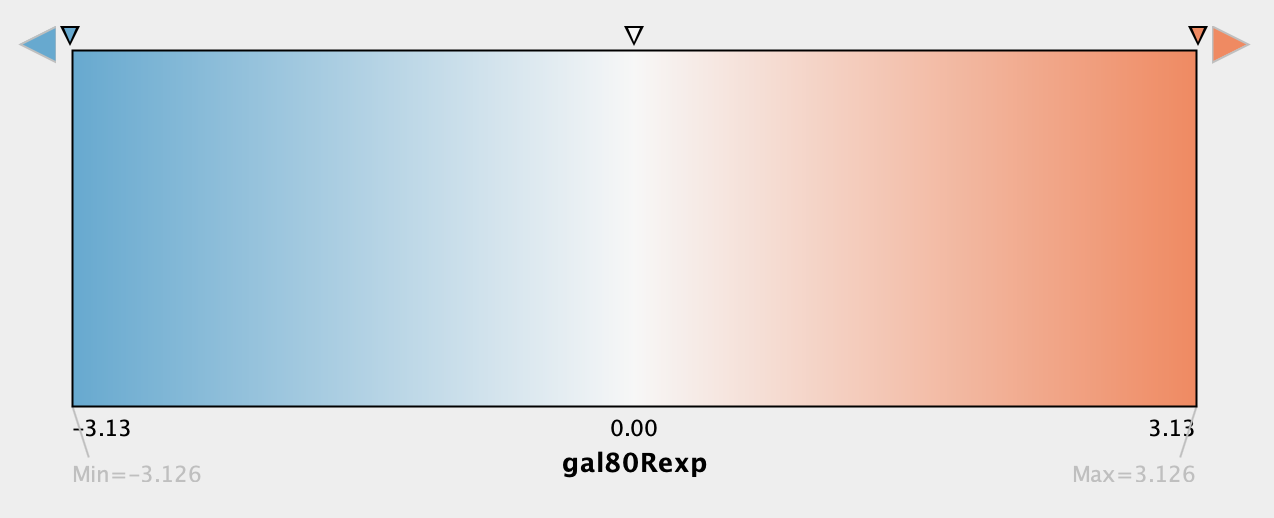

## Set Node Border Color and Width

To visualize the significance of measurements, let’s add a contiuous mapping for ‘gal80Rsig’ p-values to Node Border Color:






In [30]:
p4c.set_node_border_color_mapping('gal80Rsig',[0,0.05], ["#FF0000","#FF0000","#FF0000","#555555"],style_name="galFiltered Style")

''

Note: We are supplying a min and max points, together with four color values. Providing n+2 values will result in assigning “below min” and “above max” mappings (see image).

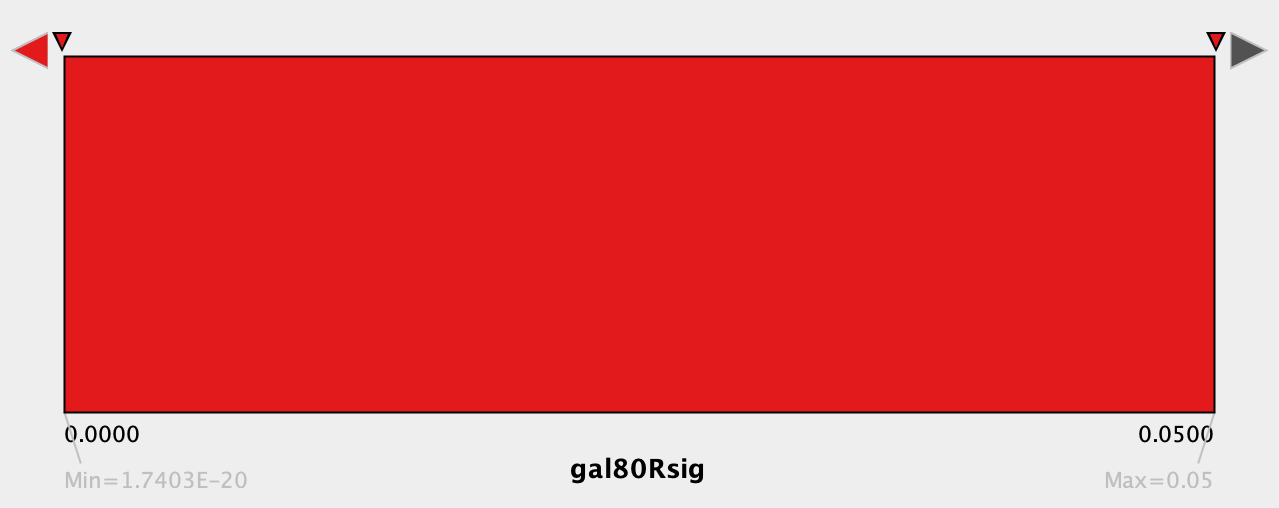

…and let’s also map the same gal80RSig values to set the Node Border Widths:



## Set Node Border Width

You can set the Border Width by

In [31]:
p4c.set_node_border_width_mapping('gal80Rsig',[0,0.05], [4,4,4,1],style_name="galFiltered Style")

''

Note: We are supplying the same min and max points, together with just two width values. Providing n values will result in 1:1 assignments.


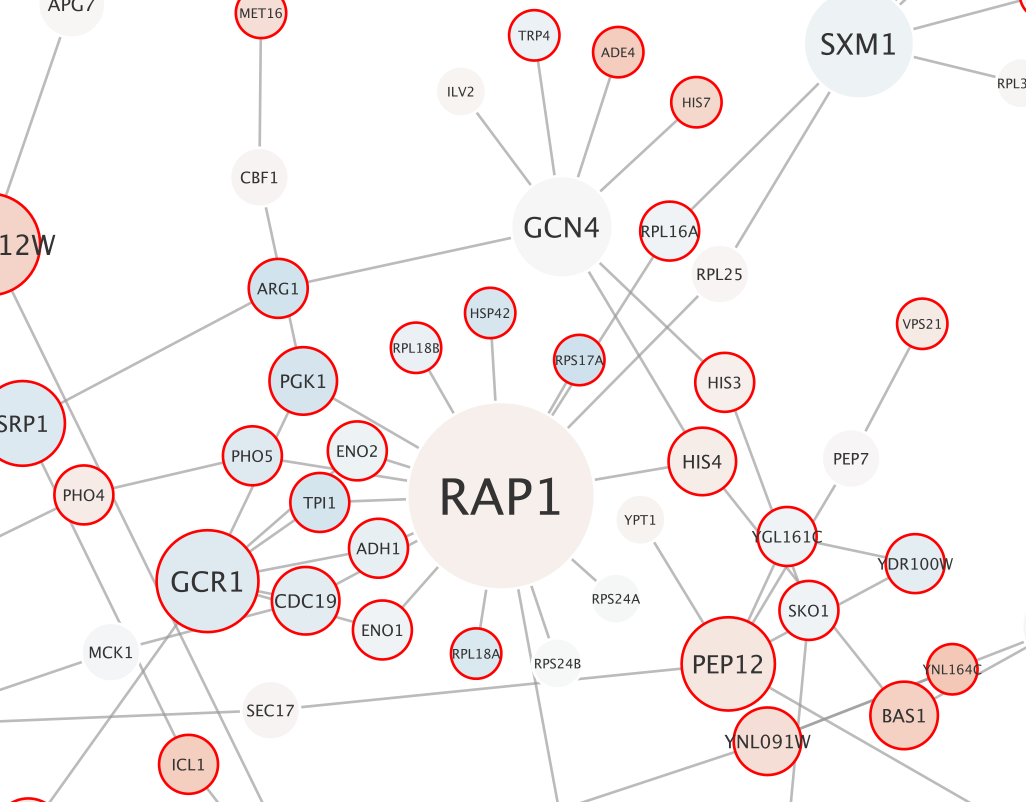

## Layouts

An important aspect of network visualization is the layout, meaning the positioning of nodes and edges. Our network had a preset layout in the original file you imported, but this can be changed.

*   Let’s change the layout to **Degree Sorted Circle Layout** by

In [32]:
p4c.layout_network('degree-circle')

{}

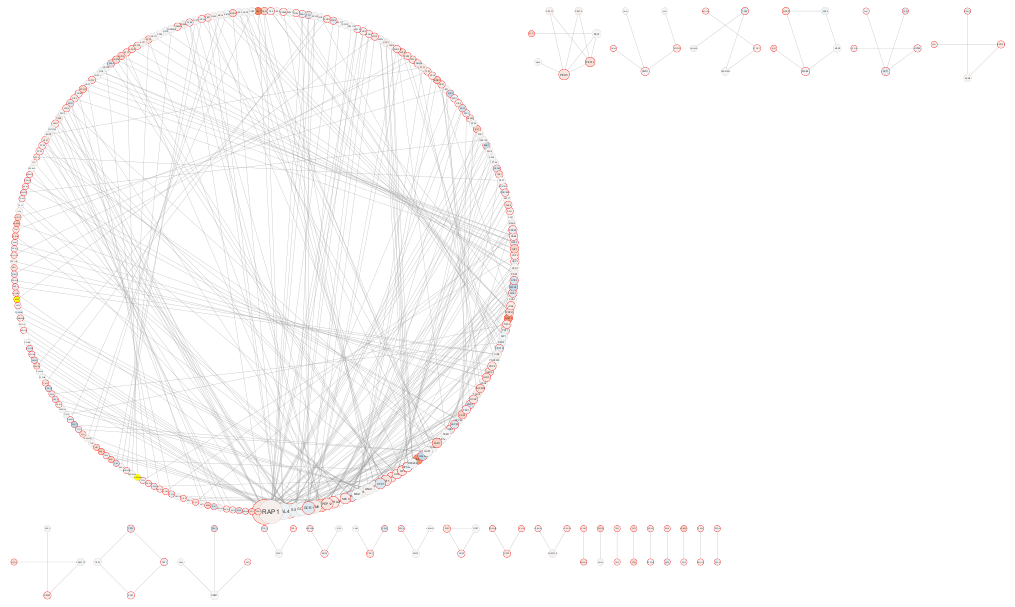

In [33]:
from IPython.display import Image
p4c.export_image(filename='degree-circle.png')
p4c.sandbox_get_from('degree-circle.png')
Image('degree-circle.png')

In this layout, nodes are sorted by degree (connectedness), with the highest degree node at the 6 o’clock position, and remaining nodes are sorted counter clock-wise based on decreasing degree.

For this network, a degree-sorted circle layout may not be the most effective. Instead, let’s try a force-directed layout instead, which may work better with this network.

In [34]:
p4c.layout_network('force-directed')

{}

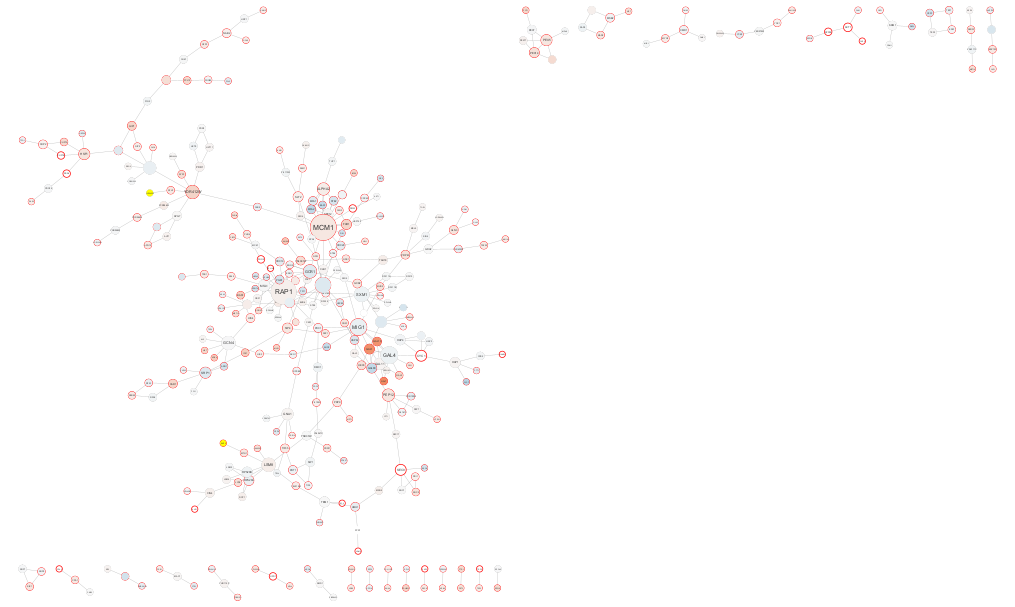

In [35]:
p4c.export_image(filename='force-directed.png')
p4c.sandbox_get_from('force-directed.png')
Image('force-directed.png')

Cytoscape supports many different layout algorithms, described in detail in the [Cytoscape manual](http://manual.cytoscape.org/en/stable/Navigation_and_Layout.html?highlight=layout#automatic-layout-algorithms).

## Select Nodes

Cytoscape allows you to easily filter and select nodes and edges based on data attributes. Next, we will select a subset of nodes with high expression in the gal80 knockout:

Let’s select a subset of nodes with high expression in the gal80 knockout:

In [36]:
p4c.create_column_filter('myFilter', 'gal80Rexp', 2.00, "GREATER_THAN")

No edges selected.


{'nodes': ['YBR018C', 'YBR020W', 'YBR019C'], 'edges': None}

You should now see only a few nodes in the network selected (highlighted yellow).

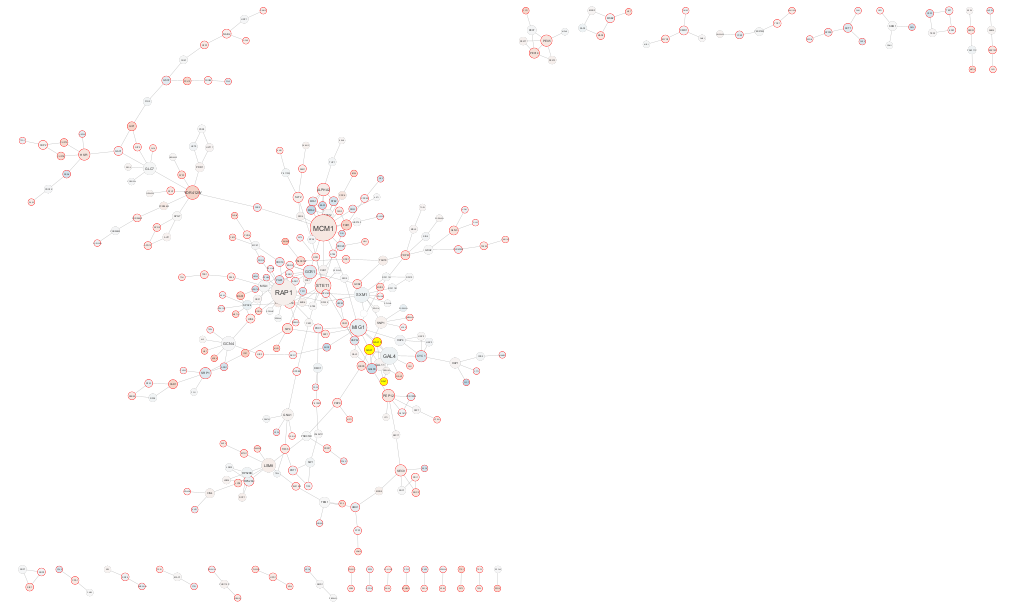

In [37]:
p4c.export_image(filename='column-filter.png')
p4c.sandbox_get_from('column-filter.png')
Image('column-filter.png')

## Expand Selection and Create New Network

We have now selected only the few top expressing nodes. To see the context of these nodes in the larger network, we can expand the selection to second-degree neighbors:

In [38]:
p4c.select_first_neighbors()  # first degree
p4c.select_first_neighbors()  # second degree

{'nodes': [625,
  241,
  627,
  629,
  631,
  503,
  633,
  729,
  569,
  635,
  347,
  637,
  381,
  485,
  359,
  361,
  587],
 'edges': []}

In [39]:
p4c.create_subnetwork(nodes="selected", subnetwork_name='galFiltered sub')
p4c.layout_network('force-directed')

{}

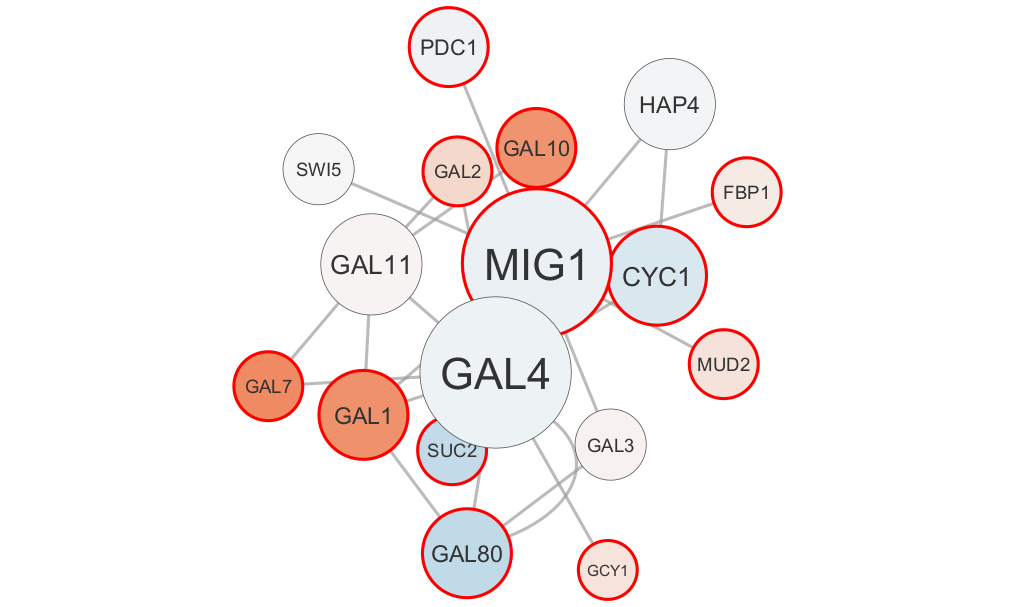

In [40]:
p4c.export_image(filename='first-neighbors.png')
p4c.sandbox_get_from('first-neighbors.png')
Image('first-neighbors.png')

Digging into the biology of this network, it turns out that GAL4 is repressed by GAL80. Both nodes (GAL4 and GAL11) show fairly small changes in expression, and neither change is statistically significant: they are pale blue with thin borders. These slight changes in expression suggest that the critical change affecting the red nodes might be somewhere else in the network, and not either of these nodes. GAL4 interacts with GAL80, which shows a significant level of repression: it is medium blue with a thicker border.

Note that while GAL80 shows evidence of significant repression, most nodes interacting with GAL4 show significant levels of induction: they are rendered as red rectangles. GAL11 is a general transcription co-factor with many interactions.

Putting all of this together, we see that the ___transcriptional activation activity of Gal4 is repressed by Gal80___. So, repression of Gal80 increases the transcriptional activation activity of Gal4. Even though the expression of Gal4 itself did not change much, ___the Gal4 transcripts were much more likely to be active transcription factors when Gal80 was repressed___. This explains why there is so much up-regulation in the vicinity of Gal4.

## Summary

In summary, we have:

*   Explored a yeast interactome from a transcription factor knockout experiment
*   Created a visual style using expression value as node color and with border width mapped to significance
*   Selected high expressing genes and their neighbors and created a new network

Finally, we can now export this network as a publication-quality image….


## Saving Results

Cytoscape provides a number of ways to save results and visualizations:

*   As a session:

In [41]:
p4c.save_session('basic-data-visualization.cys')

{}

*   As an image:

In [42]:
p4c.export_image('basic-data-visualization', type='PDF')

# Note: PNG, SVG, JPEG and PS are also supported
#p4c.export_image('basic-data-visualization', type='PNG')
#p4c.export_image('basic-data-visualization', type='JPEG')
#p4c.export_image('basic-data-visualization', type='SVG')
#p4c.export_image('basic-data-visualization', type='PS')

{'file': 'C:\\Users\\bb38121075\\CytoscapeConfiguration\\filetransfer\\default_sandbox\\basic-data-visualization.pdf'}

*   To a public repository:

```
p4c.export_network_to_ndex('userid', 'password', True)
```

*   As a graph format file (Formats: “CX JSON”, “Cytoscape.js JSON”, “GraphML”, “XGMML”, “SIF”,…):

In [43]:
p4c.export_network('basic-data-visualization', 'CX')

# Note: cyjs, graphML, xGMML and SIF are also supported
#p4c.export_network('basic-data-visualization', 'cyjs')
#p4c.export_network('basic-data-visualization', 'graphML')
#p4c.export_network('basic-data-visualization', 'xGMML')
#p4c.export_network('basic-data-visualization', 'SIF')

{'file': 'C:\\Users\\bb38121075\\CytoscapeConfiguration\\filetransfer\\default_sandbox\\basic-data-visualization.cx'}